# Pipeline
This is one example how to use the pipeline and generate new samples.
Please use this next to the docstrings to understand how to use the pipeline.

In [1]:
# General
import torch

# Import the models and pipeline
from models import LeNet5, CGanGenerator
from pipeline import generate_samples

# Import to display result
from utils import plot_prediction_switch

### Variables
Following are variables are used for the pipeline:
- CLASSIFIER: The classifier $C$ that will be used by the pipeline. The pipeline takes either the whole model, that path to the model-file or the path to the models weights-file.
- GENERATOR: The classifier $G$ that will be used by the pipeline. The pipeline takes either the whole model, that path to the model-file or the path to the models weights-file.
- N_GENERATED_SAMPLES: The number of samples to generate.
- N_TIMEOUT: The number of trials before continue to higher epsilon.

In [9]:
# Paths to set
# The path to the classifier, that will be used by the pipeline. It can be a path to the models weights or the model will be passed directly.
CLASSIFIER_STATE_DICT_PATH = r"models\state_dicts\lenet5.pt"
# The path to the generator, that will be used by the pipeline. It can be a path to the models weights or the model will be passed directly.
GENERATOR_STATE_DICT_PATH = r"models\state_dicts\conditional_gan_generator.pt"

# Set random seed for reproducibility
torch.manual_seed(0)

# Get the device for cuda optimization
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE = torch.device('cpu')

# Load the classifier
classifier = LeNet5()
classifier.load_state_dict(torch.load(CLASSIFIER_STATE_DICT_PATH))
classifier.to(DEVICE)

# Load the Generator
generator = CGanGenerator(100, (1,28,28))
generator.load_state_dict(torch.load(GENERATOR_STATE_DICT_PATH))
generator.to(DEVICE)

# Number of samples to generate
N_GENERATED_SAMPLES=25

# Number of trials per epsilon before algorithm continues with higher perturbation or time out
N_TIMEOUT = 1000

# Weighting factor of perturbation (between 0 and 1)
EPSILON = 0.45

# Target of class that will be created. In MNIST examples now samples will be generated for a number 1
TARGET_CLASS = 8
TARGET = torch.LongTensor([TARGET_CLASS]).to(DEVICE)

## Generate samples

Generated 25 adversarial samples with generator


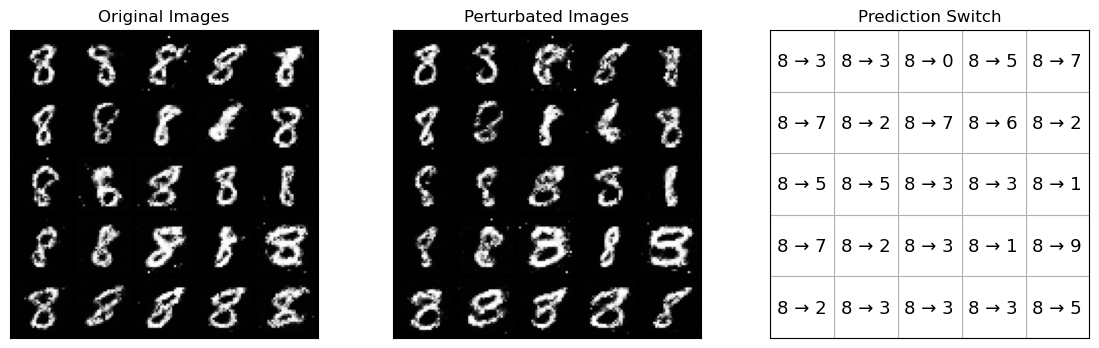

In [10]:
# generate samples will return the noise (z), label (y) with the perturbated version with per_z and per_y
generator.set_label(TARGET)
classifier, generator, (z, y, per_z, per_y) = generate_samples(classifier, generator, DEVICE, TARGET, N_GENERATED_SAMPLES, EPSILON, N_TIMEOUT)

# To get the image of the number generate the images with the generator,
x, per_x = generator(z).detach(), generator(per_z).detach()

# Display the result
print(f"Generated {len(z)} adversarial samples with generator")
if len(z) >= 25:
    plot_prediction_switch(per_x, x, y, per_y)